In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv('E:/titanic.csv')

In [3]:
data.drop(['PassengerId','Ticket','Name'],inplace = True,axis = 1)


In [4]:
data['Age'] = data['Age'].fillna(data.Age.mean())
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,1,22.000000,1,0,7.2500,G,S,0
1,1,0,38.000000,1,0,71.2833,C,C,1
2,3,0,26.000000,0,0,7.9250,G,S,1
3,1,0,35.000000,1,0,53.1000,C,S,1
4,3,1,35.000000,0,0,8.0500,G,S,0
...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,G,S,0
887,1,0,19.000000,0,0,30.0000,B,S,1
888,3,0,29.699118,1,2,23.4500,F,S,0
889,1,1,26.000000,0,0,30.0000,C,C,1


In [5]:
x = data.iloc[:,0:8]
y = data.iloc[:,8]

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,test_size = 0.30)

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [8]:
transformer = ColumnTransformer(transformers =[    
    ('tnf1',OneHotEncoder(sparse = False,drop = 'first'),['Sex','Embarked','Cabin']),
    ('tnf2',OrdinalEncoder(categories = [[1,2,3]]),['Pclass'])],remainder = 'passthrough')

In [9]:
x1 = transformer.fit_transform(x_train)
xt = transformer.fit_transform(x_test)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
model = DecisionTreeClassifier()

In [12]:
x1

array([[  1.    ,   0.    ,   1.    , ...,   0.    ,   2.    ,  81.8583],
       [  1.    ,   0.    ,   1.    , ...,   0.    ,   0.    ,   7.8958],
       [  0.    ,   0.    ,   1.    , ...,   1.    ,   1.    ,  11.1333],
       ...,
       [  1.    ,   0.    ,   1.    , ...,   2.    ,   0.    ,  14.1083],
       [  0.    ,   0.    ,   1.    , ...,   1.    ,   2.    , 120.    ],
       [  1.    ,   0.    ,   1.    , ...,   0.    ,   1.    ,  77.2875]])

In [13]:
model.fit(x1,y_train)

DecisionTreeClassifier()

In [14]:
train_pred = model.predict(x1)

In [15]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [16]:
# accuracy on train data
confusion_matrix(y_train,train_pred)

array([[391,   1],
       [ 10, 221]], dtype=int64)

In [17]:
precision_score(y_train,train_pred)

0.9954954954954955

In [18]:
recall_score(y_train,train_pred)

0.9567099567099567

In [19]:
f1_score(y_train,train_pred)

0.9757174392935982

^C

Note: you may need to restart the kernel to use updated packages.


In [21]:
# for test data 
prediction = model.predict(xt)

In [22]:
confusion_matrix(y_test,prediction)

array([[122,  35],
       [ 35,  76]], dtype=int64)

In [23]:
precision_score(y_test,prediction)

0.6846846846846847

In [24]:
recall_score(y_test,prediction)

0.6846846846846847

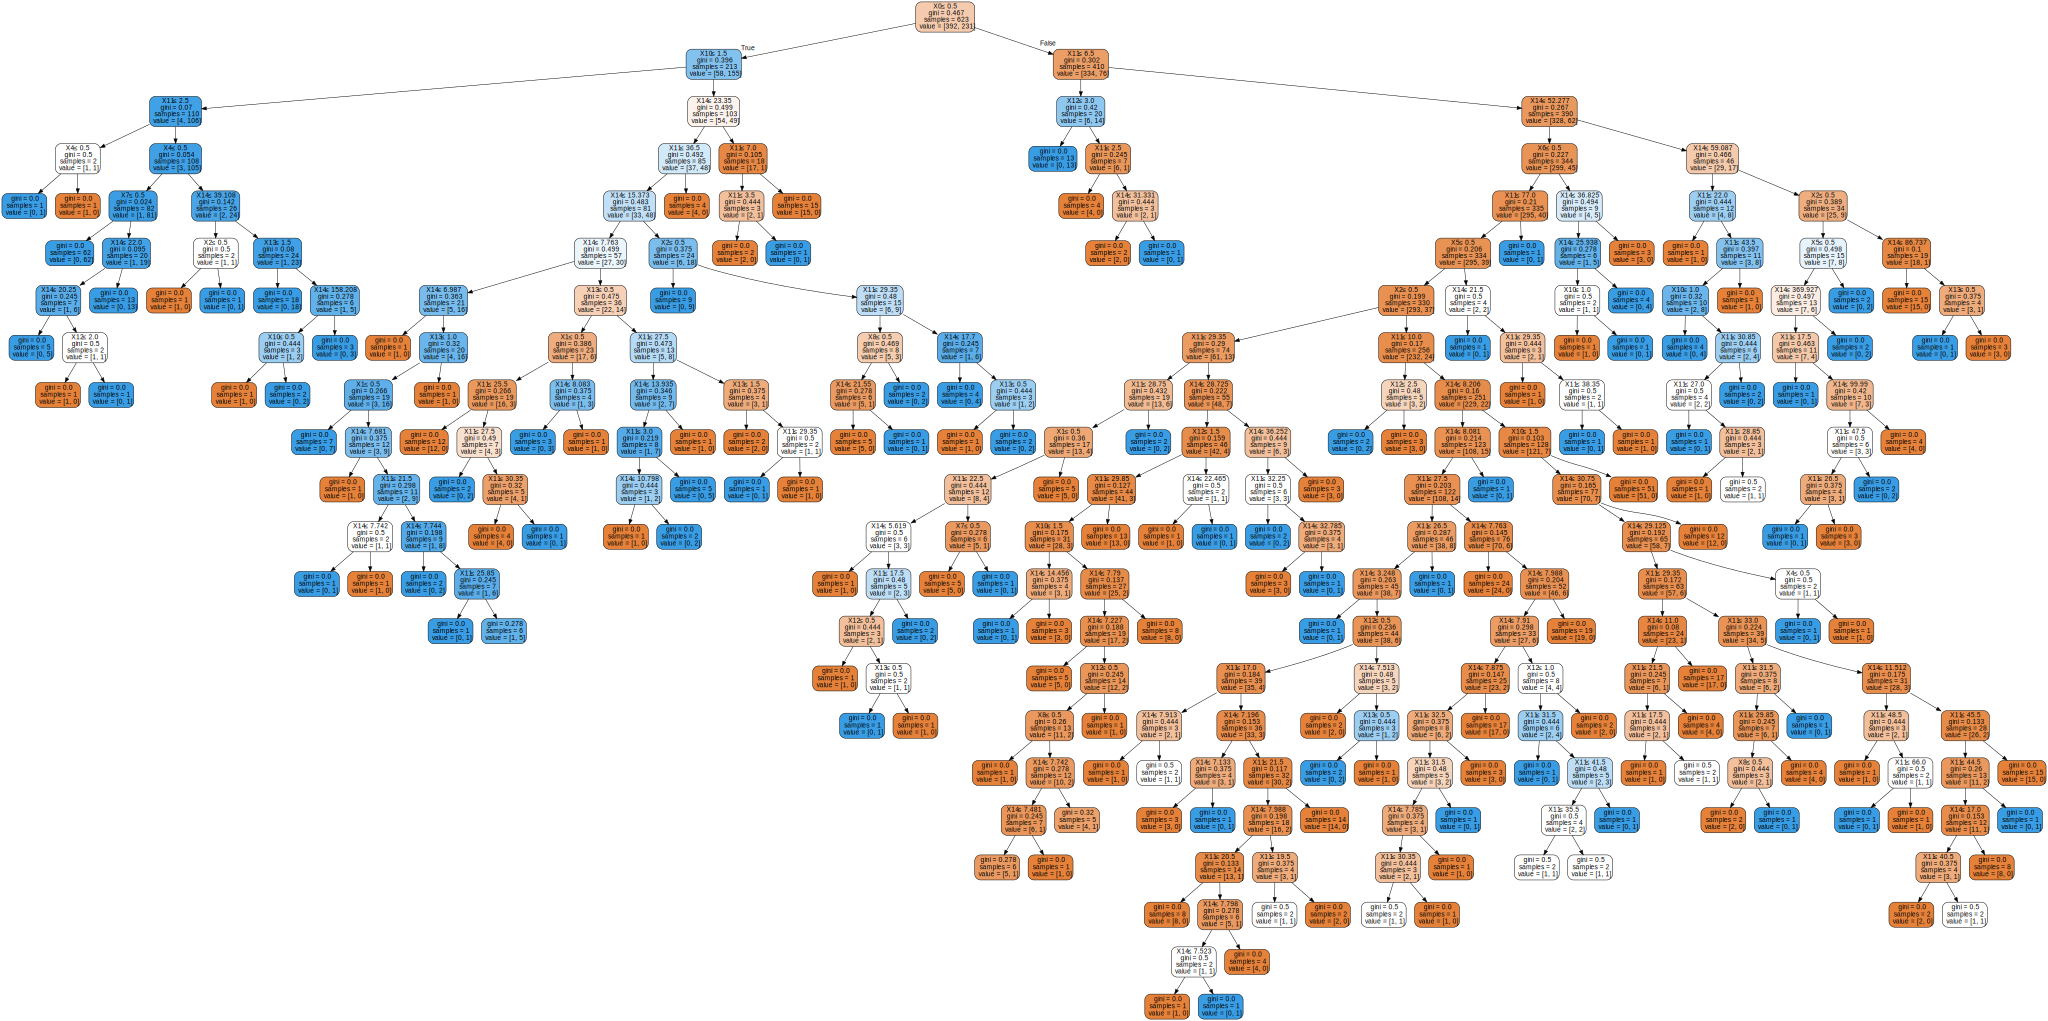

<Figure size 720x720 with 0 Axes>

In [29]:
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz
plt.figure(figsize = (10,10))
dot_data = tree.export_graphviz(model, out_file=None, 
                     
                   filled=True, rounded=True,  
                   special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# our model _is overfitting so let do hyper parameter tunning

In [30]:
model1 = DecisionTreeClassifier()

In [31]:
param_dist = {'criterion':['gini','entropy'],
             'max_depth':[1,2,3,4,5,6,None]}

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
grid = GridSearchCV(model1,param_grid = param_dist,cv = 10,n_jobs = -1)

In [34]:
grid.fit(x1,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, None]})

In [35]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [67]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 4)

In [68]:
model2.fit(x1,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [69]:
train_p = model2.predict(x1)
re = model2.predict(xt)

In [70]:
confusion_matrix(y_test,re),confusion_matrix(y_train,train_p)

(array([[141,  16],
        [ 33,  78]], dtype=int64),
 array([[355,  37],
        [ 62, 169]], dtype=int64))

In [71]:
precision_score(y_test,re),precision_score(y_train,train_p)

(0.8297872340425532, 0.8203883495145631)

In [ ]:
# overfitting reduced
